# Nba Regular Season 2018-19 Data Challenge

Your task will be to take the dataset given, and create an analysis answering the following 10 questions. This project will again test your knowledge of pandas in order to find the answers needed given the data you are presented with.

In [242]:
# Importing pandas and matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("nbastats2018-2019.csv")

for col in df:
    print(col)

display(df)

Name
Height
Weight
Team
Age
Salary
Points
Blocks
Steals
Assists
Rebounds
FT%
FTA
FG3%
FG3A
FG%
FGA
MP
G
PER
OWS
DWS
WS
WS48
USG
BPM
VORP


,Name,Height,Weight,Team,Age,Salary,Points,Blocks,Steals,Assists,...,MP,G,PER,OWS,DWS,WS,WS48,USG,BPM,VORP
0,Alex Abrines,78,200,Oklahoma City Thunder,25,5455236,5.3,0.2,0.5,0.6,...,19.0,31,6.3,0.1,0.6,0.6,0.053,12.2,-3.4,-0.2
1,Quincy Acy,79,240,Phoenix Suns,28,213949,1.7,0.4,0.1,0.8,...,12.3,10,2.9,-0.1,0.0,-0.1,-0.022,9.2,-5.9,-0.1
2,Jaylen Adams,74,190,Atlanta Hawks,22,236854,3.2,0.1,0.4,1.9,...,12.6,34,7.6,-0.1,0.2,0.1,0.011,13.5,-4.4,-0.3
3,Steven Adams,84,265,Oklahoma City Thunder,25,24157304,13.9,1.0,1.5,1.6,...,33.4,80,18.5,5.1,4.0,9.1,0.163,16.4,2.7,3.2
4,Bam Adebayo,82,255,Miami Heat,21,2955840,8.9,0.8,0.9,2.2,...,23.3,82,17.9,3.4,3.4,6.8,0.171,15.8,3.0,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Trae Young,74,180,Atlanta Hawks,20,5356440,19.1,0.2,0.9,8.1,...,30.9,81,17.0,2.5,0.7,3.3,0.062,28.4,-1.1,0.6
517,Cody Zeller,84,240,Charlotte Hornets,26,13528090,10.1,0.8,0.8,2.1,...,25.4,49,17.2,2.6,1.2,3.9,0.150,16.3,2.0,1.2
518,Tyler Zeller,84,253,Atlanta Hawks,29,106974,7.7,0.5,0.2,0.7,...,15.5,6,17.3,0.2,0.1,0.3,0.167,20.1,-2.2,0.0
519,Ante Zizic,83,254,Cleveland Cavaliers,22,1952760,7.8,0.4,0.2,0.9,...,18.3,59,16.2,1.7,0.3,2.0,0.087,18.2,-3.1,-0.3


# What was the average age of player in the league?

25

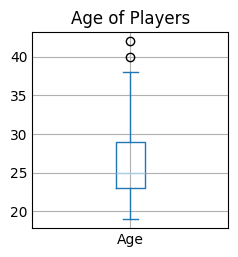

In [715]:
# Using mean() on Age column to determine the average age of players in the league
display(df["Age"].mean().astype(int))

df['Age'].plot(kind='box', title='Age of Players')
plt.show()
 
# The average age of players in the league was 25.

# What player scored the most points?

In [698]:
# Filter the player with the most points by multiplying avg points per game [Points] and total number of games [G]
best_points_player = df[df.Points == df.Points.max()]
bp_df = pd.DataFrame(best_points_player)
bp_df["Total Points"] = bp_df["Points"] * bp_df["G"]

display(bp_df[["Name","Team","Total Points"]])

# Based on his average points per game [Points] multiplied by total games [G],
# James Harden of the Houston Rockets scored the most points of the season.

,Name,Team,Total Points
202,James Harden,Houston Rockets,2815.8


# What player had the most blocks during the season? Was it a post player (F/C)?

In [692]:
# Filter the player with the most blocks by multiplying avg blocks per game [Blocks] and total number of games [G]
# Then, determine if he's a forward or center based on the given data (height primarily and weight)
best_blocks_player = df[df.Blocks == df.Blocks.max()]
bb_df = pd.DataFrame(best_blocks_player)
bb_df["Total Blocks"] = bb_df["Blocks"] * bb_df["G"]
bb_df["Height (Ft)"] = bb_df["Height"] / 12

display(bb_df[["Name","Team","Height (Ft)","Weight","Total Blocks"]])

# Myles Turner of the Indiana Pacers had the most blocks, and based on his height and weight,
# it's a high probability that he is a post player (either a power foward or a center).

,Name,Team,Height (Ft),Weight,Total Blocks
476,Myles Turner,Indiana Pacers,6.916667,250,199.8


# Based on the regular season, who had the best chance to win a title given their win percentage?

<Axes: title={'center': 'Avg Team Win Shares'}, xlabel='Team'>

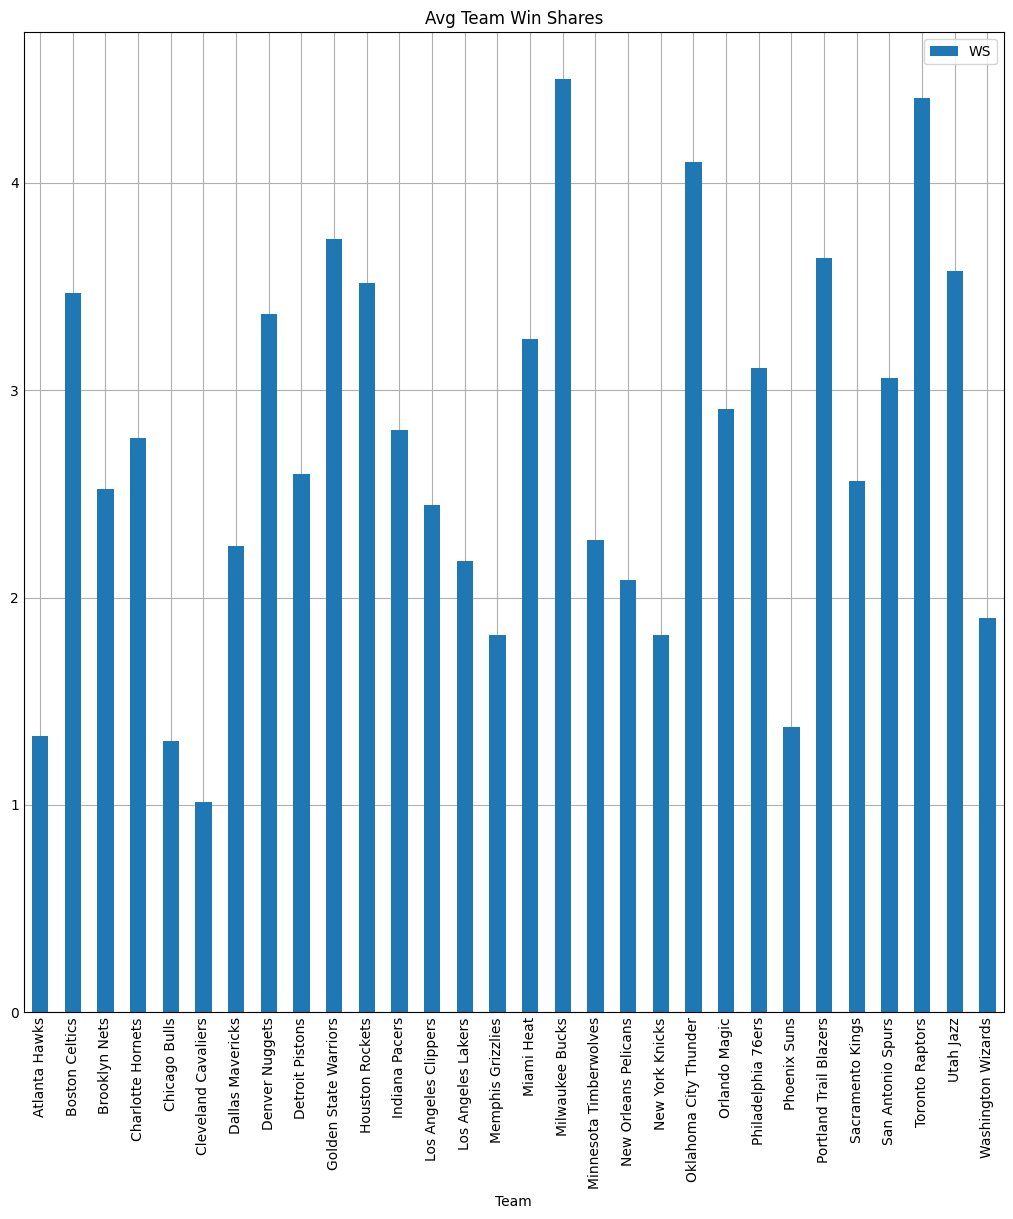

In [752]:
# Filtering win shares [WS] to the max()
title_team = df.groupby('Team', as_index=False)['WS'].mean()

# display(title_team[["Team","WS"]])

title_team.plot(x='Team',
                figsize=(10, 10),
                kind='bar',
                stacked=False,
                title="Avg Team Win Shares")

# Based on each teams average win shares per player, the Milwaukee Bucks
# would be most likely win a title with 4.5 win shares per player.

# What player had the best 3-pt percentage? 

In [694]:
# Filtering dataframe to highest 3-pt percentages [FG3%] and displaying any 3pt attempts [FG3A] greater than 0
best_3p = df[df.iloc[:, 13] == df.iloc[:, 13].max()]
best_3p_results = best_3p[(best_3p['FG3A'] > 0) & best_3p['FG3%'] == 1]

display(best_3p_results[["Name","Team","FG3A","FG3%"]])

# Technically, Jordan Sibert has the best percentage at 100% of his 3-pot shots successful.
# However, a total of four players have 100% FG3%.

,Name,Team,FG3A,FG3%
147,Trevon Duval,NaN,0.3,1.0
312,Scott Machado,Los Angeles Lakers,0.3,1.0
352,Eric Moreland,Phoenix Suns,0.2,1.0
439,Jordan Sibert,Atlanta Hawks,1.0,1.0


# Who played the most minutes during the season

In [695]:
# Determine who had the most minutes played in the season by multiplying minutes played [MP] by total number of games [G]
best_mp_player = df[df.MP == df.MP.max()]
bmp_df = pd.DataFrame(best_mp_player)
bmp_df["Total Minutes Played"] = bmp_df["MP"] * bmp_df["G"]

display(bmp_df[["Name","Team","Total Minutes Played"]].head(1))

# Breadly Beal of the Washington Wizards played the most minutes, with a total of 3,025.8 minutes played.

,Name,Team,Total Minutes Played
37,Bradley Beal,Washington Wizards,3025.8


# What player given their player effiecency rating was the clutchest during the season?

In [697]:
# Determine who had the highest PER (player efficiency rating) of the season
best_per_player = df[df.PER == df.PER.max()]
bper_df = pd.DataFrame(best_per_player)
bper_df["Player Efficiency Rating"] = bper_df["PER"]

display(bper_df[["Name","Team","Player Efficiency Rating"]])

# Zhou Qi of the Houston Rockets had the highest player efficiency of the season.

,Name,Team,Player Efficiency Rating
405,Zhou Qi,Houston Rockets,80.4


# What team had the youngest roster?

<Axes: title={'center': 'Average Player Age'}, xlabel='Team'>

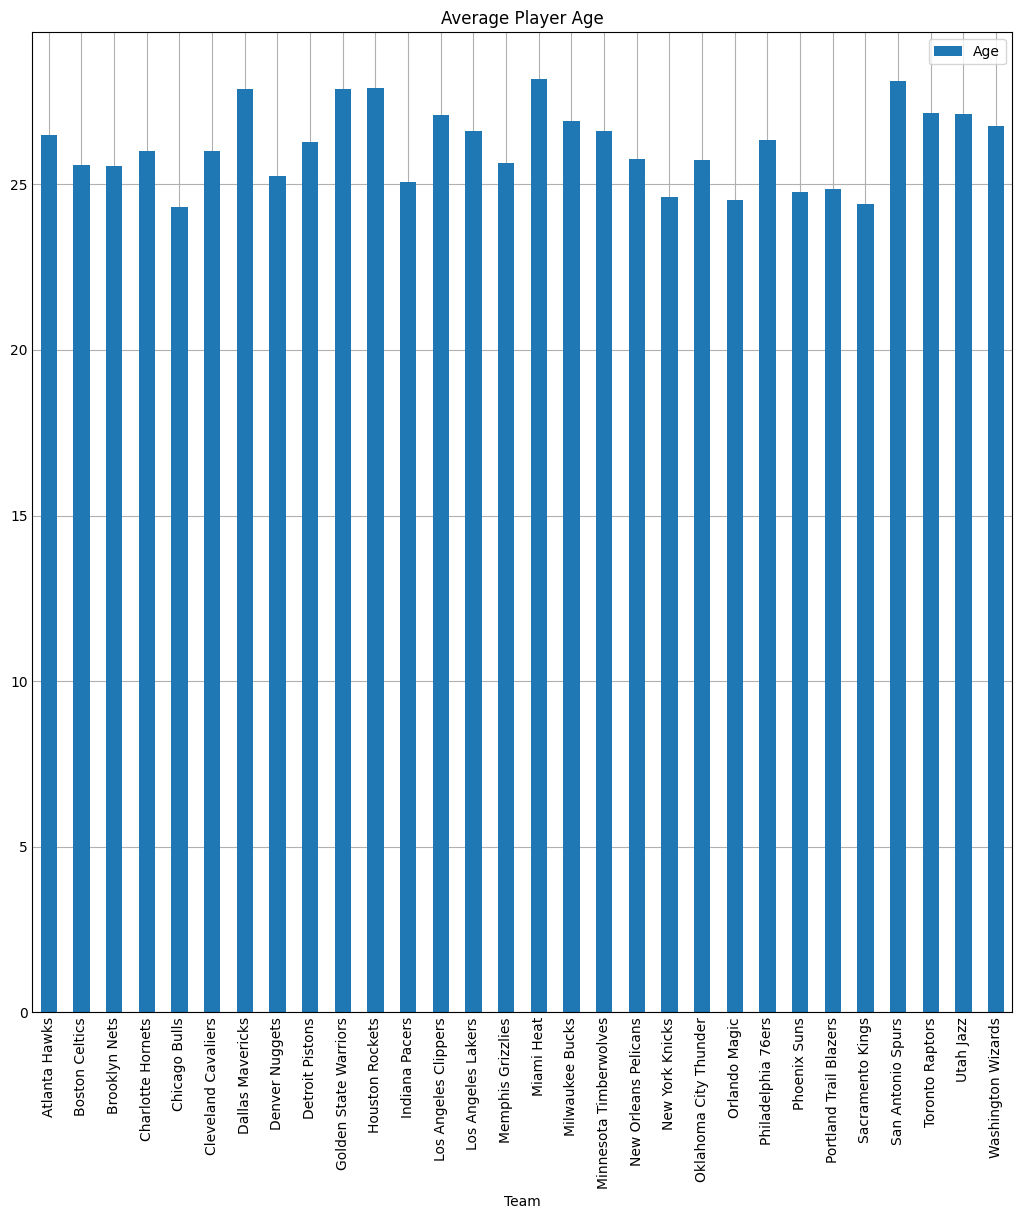

In [753]:
# Group DF by team, then display the mean age of the entire teams roster
youngest_team = df.groupby('Team', as_index=False)['Age'].mean()

#display(youngest_team[['Team','Age']])

youngest_team.plot(x='Team',
           figsize=(10, 10),
           kind='bar',
           stacked=False,
           title="Average Player Age")

# Based on the data, the Chicago Bulls had the youngest roster with an average player age of 24.3

# Who is the highest paid player during the seasion?

In [643]:
# Identifying the highest paid player of the season using .max()
highest_paid = df[df.Salary == df.Salary.max()]

display(highest_paid[["Name","Salary"]])

# The highest paid player of the season was Stephen Curry, with a salary of $37,457,154

,Name,Salary
121,Stephen Curry,37457154.0


# At the end of a game, who WOULDN'T you want on the Free Throw Line?

In [529]:
# Filter DF down to players where free throw attempts [FTA] is greater than 0 and free throw percentage [FT%] is 50% or lower
ft_stats = pd.DataFrame(df)
ft_results = ft_stats[(ft_stats['FT%'] <= 0.5) & ft_stats['FTA'] > 0]
ft_lowest = pd.DataFrame(ft_results[["Name", "FTA", "FT%"]])
ft_lowest.rename(columns={0 :"Worst Free Thrower"}, inplace=True)
display(ft_lowest)

# Based on free throw statistics, the players below are 50% likely to miss the shot and lose the game.

,Name,FTA,FT%
3,Steven Adams,3.7,0.500
16,Kostas Antetokounmpo,2.0,0.500
27,Lonzo Ball,1.0,0.417
56,Jonah Bolden,0.6,0.481
61,Tony Bradley,0.7,0.500
128,Angel Delgado,1.0,0.500
141,PJ Dozier,0.3,0.500
168,Melvin Frazier,0.4,0.250
199,Daniel Hamilton,0.3,0.500
221,Haywood Highsmith,0.4,0.000
